# Convolutional Neural Networks 

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torchsummary import summary

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.data import random_split

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Download MNIST & Define DataLoader

- `ToTensor()` transforms data into `Tensor` type and also normalizes into `[0,1]` range.

In [4]:
transform = transforms.Compose([transforms.ToTensor()])

dataset = MNIST(root='', train=True, download=True, transform=transform)
testset = MNIST(root='', train=False, download=True, transform=transform)

0.3%

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


113.5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


180.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/opt/anaconda3/envs/mathdl/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [14]:
dataset.data.size()

torch.Size([60000, 28, 28])

In [15]:
dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
len(dataset)

60000

In [9]:
train_num = int(len(dataset)*0.9)
valid_num = len(dataset) - train_num

In [10]:
trainset, validset = random_split(dataset, [train_num, valid_num])

In [11]:
batch_size = 128
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)
validloader = DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=4)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

In [16]:
data, label = next(iter(trainloader))

In [18]:
data[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2627, 0.9961,
          0.0980, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5608, 0.9922,
          0.8000, 0.0902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6941, 0.9922,
          0.9922, 0.3451, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [19]:
label[0]

tensor(6)

If we use a CNN model with Pytorch, we need to change the shape of dataset as
$\left( N, C, H, W \right)$.

$N$ means the number of data.

$C$ means the number of channel.

$H$, $W$ mean the size of data.

In [7]:
X = np.reshape(X,(-1,1,28,28))
print(X.shape)

(70000, 1, 28, 28)


이 이미지 데이터의 레이블은 9이다


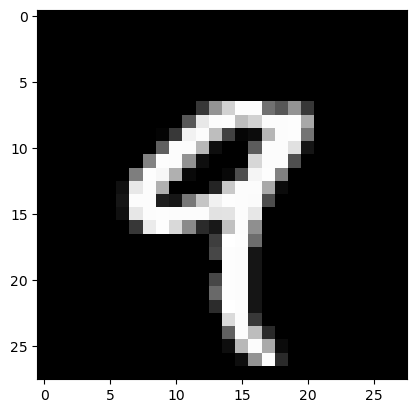

In [8]:
plt.imshow(X[4].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[4]))

Construct model
-----



Pythorch provides a convolutional neural network layer through the command "torch.nn.Conv2d".

Also, we need a (max/average) pooling layer during CNN model.

Pythorch provides a pooling layer through the command "torch.nn.MaxPool2d", "torch.nn.AvgPool2d".

torch.nn.Conv2d
------
torch.nn.Conv2d has 3 essential inputs (in_channels / out_channels / kernel_size)

in_channels : the number of channels of input data

out_channels : the number of channels of output data

kernel_size : the size of kernel 

torch.nn.Conv2d has other inessential inputs(stride / padding / padding_mode / dilation / bias etc.)

stride : the stride of the convolution - default = 1

padding : the length of padding - default = 0

padding_mode : how method of padding('zeros', 'reflect', 'replicate', 'circular') - default = 'zeros'

dilation : spacing between kernel elements - default = 1

bias : whether adding a learnable bias to the output - default = True

output size formular is

![ex_screenshot](./output_form.jpg)


In [21]:
model = nn.Sequential()
model.add_module('conv1',nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=0))
model.add_module('relu1',nn.ReLU())
model.add_module('pool1',nn.MaxPool2d(2,2))
model.add_module('conv2',nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0))
model.add_module('relu2',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(3,3))
model.add_module('flatten',nn.Flatten())
model.add_module('fc1', nn.Linear(in_features=32*3*3, out_features=64))
model.add_module('relu4', nn.ReLU())
model.add_module('fc3', nn.Linear(in_features=64, out_features=10))

summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
            Conv2d-4             [-1, 32, 9, 9]          12,832
              ReLU-5             [-1, 32, 9, 9]               0
         MaxPool2d-6             [-1, 32, 3, 3]               0
           Flatten-7                  [-1, 288]               0
            Linear-8                   [-1, 64]          18,496
              ReLU-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 32,138
Trainable params: 32,138
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.23
Params size (MB): 0.12
Estimated Tot

In [22]:
# 오차함수 선택
loss_ftn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
def train(net, trainloader, validloader, epochs, device, loss_ftn, optimizer, scheduler=None, temperature=None):
    losses = []
    accs = []
    valid_losses = []
    valid_accs = []
    
    for epoch in range(epochs):
        running_loss = 0
        valid_loss = 0
        correct = 0
        total = 0
        valid_correct = 0
        valid_total = 0

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = loss_ftn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = (correct/total)*100
        losses.append(running_loss)
        accs.append(accuracy)

        with torch.no_grad():
            for data in validloader:
                images, labels = data

                images = images.to(device)
                labels = labels.to(device)

                # calculate outputs by running images through the network
                outputs = net(images)
                loss = loss_ftn(outputs, labels)

                valid_loss += loss.item()

                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                valid_total += labels.size(0)
                valid_correct += (predicted == labels).sum().item()

        valid_accuracy = (valid_correct/valid_total)*100
        valid_losses.append(valid_loss)
        valid_accs.append(valid_accuracy)

        print('EPOCH %d Completed. \n Training Loss: %.3f, Training Accuracy: %.2f, Validation Loss: %.3f, Validation Accuracy: %.2f \n' 
              %(epoch+1, running_loss, accuracy, valid_loss, valid_accuracy))
        
        if temperature is not None:
            net.update_temperature()
            
        if scheduler is not None:
            scheduler.step()
                        
    return losses, accs, valid_losses, valid_accs

In [33]:
def test(net, testloader, device):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data

            images = images.to(device)
            labels = labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)

            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

In [29]:
EPOCHS=5

In [40]:
losses, accs, valid_losses, valid_accs = train(model, trainloader, validloader, EPOCHS, device, 
                                                   loss_ftn, optimizer, scheduler=None, temperature=None)

EPOCH 1 Completed. 
 Training Loss: 42.487, Training Accuracy: 96.94, Validation Loss: 4.180, Validation Accuracy: 97.00 

EPOCH 2 Completed. 
 Training Loss: 30.539, Training Accuracy: 97.77, Validation Loss: 3.239, Validation Accuracy: 97.85 

EPOCH 3 Completed. 
 Training Loss: 24.660, Training Accuracy: 98.16, Validation Loss: 2.852, Validation Accuracy: 98.03 

EPOCH 4 Completed. 
 Training Loss: 21.690, Training Accuracy: 98.43, Validation Loss: 2.941, Validation Accuracy: 98.03 

EPOCH 5 Completed. 
 Training Loss: 18.562, Training Accuracy: 98.62, Validation Loss: 2.441, Validation Accuracy: 98.27 



In [41]:
test(model, testloader, device)

Accuracy of the network on the 10000 test images: 98.56 %


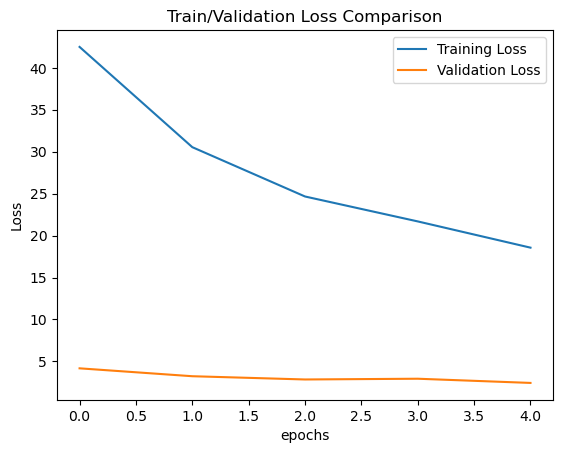

In [44]:
x = [i for i in range(EPOCHS)]
plt.plot(x, losses, label='Training Loss')
plt.plot(x, valid_losses, label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Train/Validation Loss Comparison')
plt.legend()
plt.show()

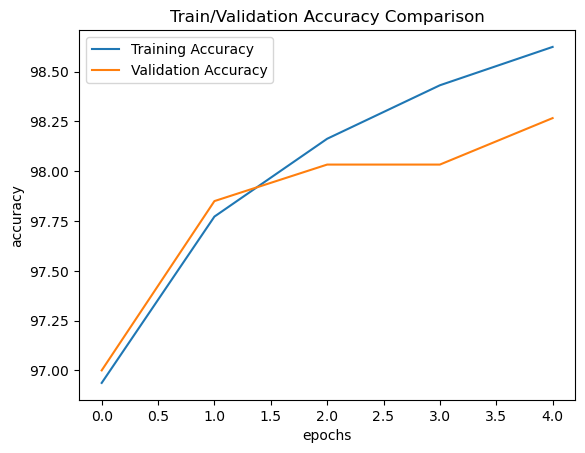

In [45]:
x = [i for i in range(EPOCHS)]
plt.plot(x, accs, label='Training Accuracy')
plt.plot(x, valid_accs, label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Train/Validation Accuracy Comparison')
plt.legend()
plt.show()

In [ ]:
index = np.random.randint(10000)

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
data = data.view([-1,1,28,28])
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted.item()))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

Before training
-----
We can test the model before training.

Check the model with data in testset
------

예측 결과 : 1
이 이미지 데이터의 정답 레이블은 1입니다


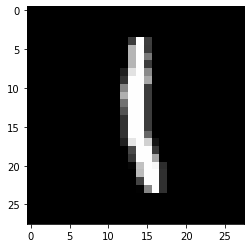

In [17]:
index = np.random.randint(10000)

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
data = data.view([-1,1,28,28])
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted.item()))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))


Check the model with custom image data
-----


In [18]:
from PIL import Image
model.eval()

img = Image.open('4-1.jpg').convert("L")
img = np.array(img)
img = img / 255.0
img = 1 - img
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

예측 결과 : 2


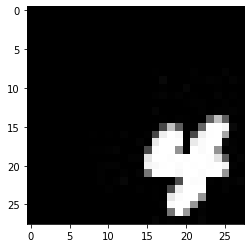

In [19]:
img = np.reshape(img,(-1,1,28,28))


data = torch.tensor(img, dtype=torch.float32)
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
print("예측 결과 : {}".format(predicted.item()))

plt.imshow(img.reshape(28, 28), cmap='gray')